In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
#from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df_train_raw = pd.read_csv('./training.csv')

In [4]:
#df_test = pd.read_csv('./test.csv')

In [5]:
#def preprocess(data, ):
#    upd_data = data.copy()
#    upd_data = upd_data.drop('EventId', axis=1)
    

In [6]:
df_train_raw[:5]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


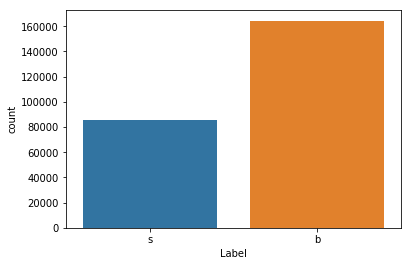

In [7]:
sns.countplot(x='Label',data=df_train_raw)

In [8]:
train_descr = df_train_raw.describe()
train_descr

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


### Look at the data

In [9]:
df = df_train_raw.copy()
df.Label = df_train_raw.Label == 's'
df = df.drop('EventId', axis=1)
df[df == -999.] = None

In [10]:
df_scal = df.copy()
mins = train_descr.loc['min'][1:]
stds = train_descr.loc['std'][1:]
df_scal.fillna(method='ffill', inplace = True)
df_scal[df.columns[:-1]] = (df_scal[df.columns[:-1]] - mins) / (stds + 1e-5)

In [11]:
df_scal[:5]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,2.799267,1.461456,2.241022,0.439552,2.200116,1.707839,2.211086,3.647877,1.882416,1.310700,...,2.046169,2.000956,2.045926,2.042458,2.177777,2.206162,2.197947,1.157947,0.000614,True
1,2.854557,1.945627,2.373477,0.756350,2.200116,1.707839,2.211086,4.170280,0.093295,0.683222,...,1.023085,1.961161,2.043014,2.043917,2.177777,2.206162,2.197947,0.471618,1.190372,False
2,2.854557,4.588272,2.929900,0.559809,2.200116,1.707839,2.211086,3.755168,0.419153,1.311167,...,1.023085,1.957456,2.045728,2.037406,2.177777,2.206162,2.197947,0.451469,1.251064,False
3,2.812642,2.303501,1.827489,0.006504,2.200116,1.707839,2.211086,3.962085,0.018587,0.258102,...,0.000000,1.957456,2.045728,2.037406,2.177777,2.206162,2.197947,-0.000000,2.903759,False
4,2.891292,0.478570,3.146708,0.257715,2.200116,1.707839,2.211086,4.704178,0.736525,0.102665,...,0.000000,1.957456,2.045728,2.037406,2.177777,2.206162,2.197947,0.000000,3.329842,False


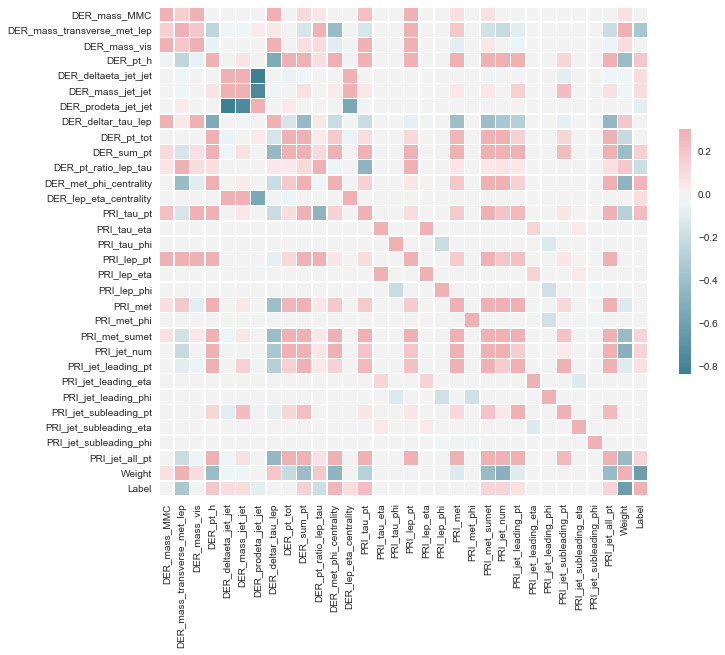

In [12]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_scal.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
features = list(set(df_scal.columns[:-1]))
n = len(features)

In [14]:
columns = ['DER_mass_transverse_met_lep', 'DER_mass_MMC', 'DER_mass_jet_jet', 'DER_lep_eta_centrality', 'DER_met_phi_centrality', 'Weight']

In [15]:
df_shrink = df_scal[columns].copy()

In [16]:
df_shrink[:5]

,DER_mass_transverse_met_lep,DER_mass_MMC,DER_mass_jet_jet,DER_lep_eta_centrality,DER_met_phi_centrality,Weight
0,1.461456,2.799267,1.707839,2.202838,2.354233,0.000614
1,1.945627,2.854557,1.707839,2.202838,2.369313,1.190372
2,4.588272,2.854557,1.707839,2.202838,2.369313,1.251064
3,2.303501,2.812642,1.707839,2.202838,0.108077,2.903759
4,0.478570,2.891292,1.707839,2.202838,0.024296,3.329842


In [17]:
df_shrink["Label"] = df["Label"]

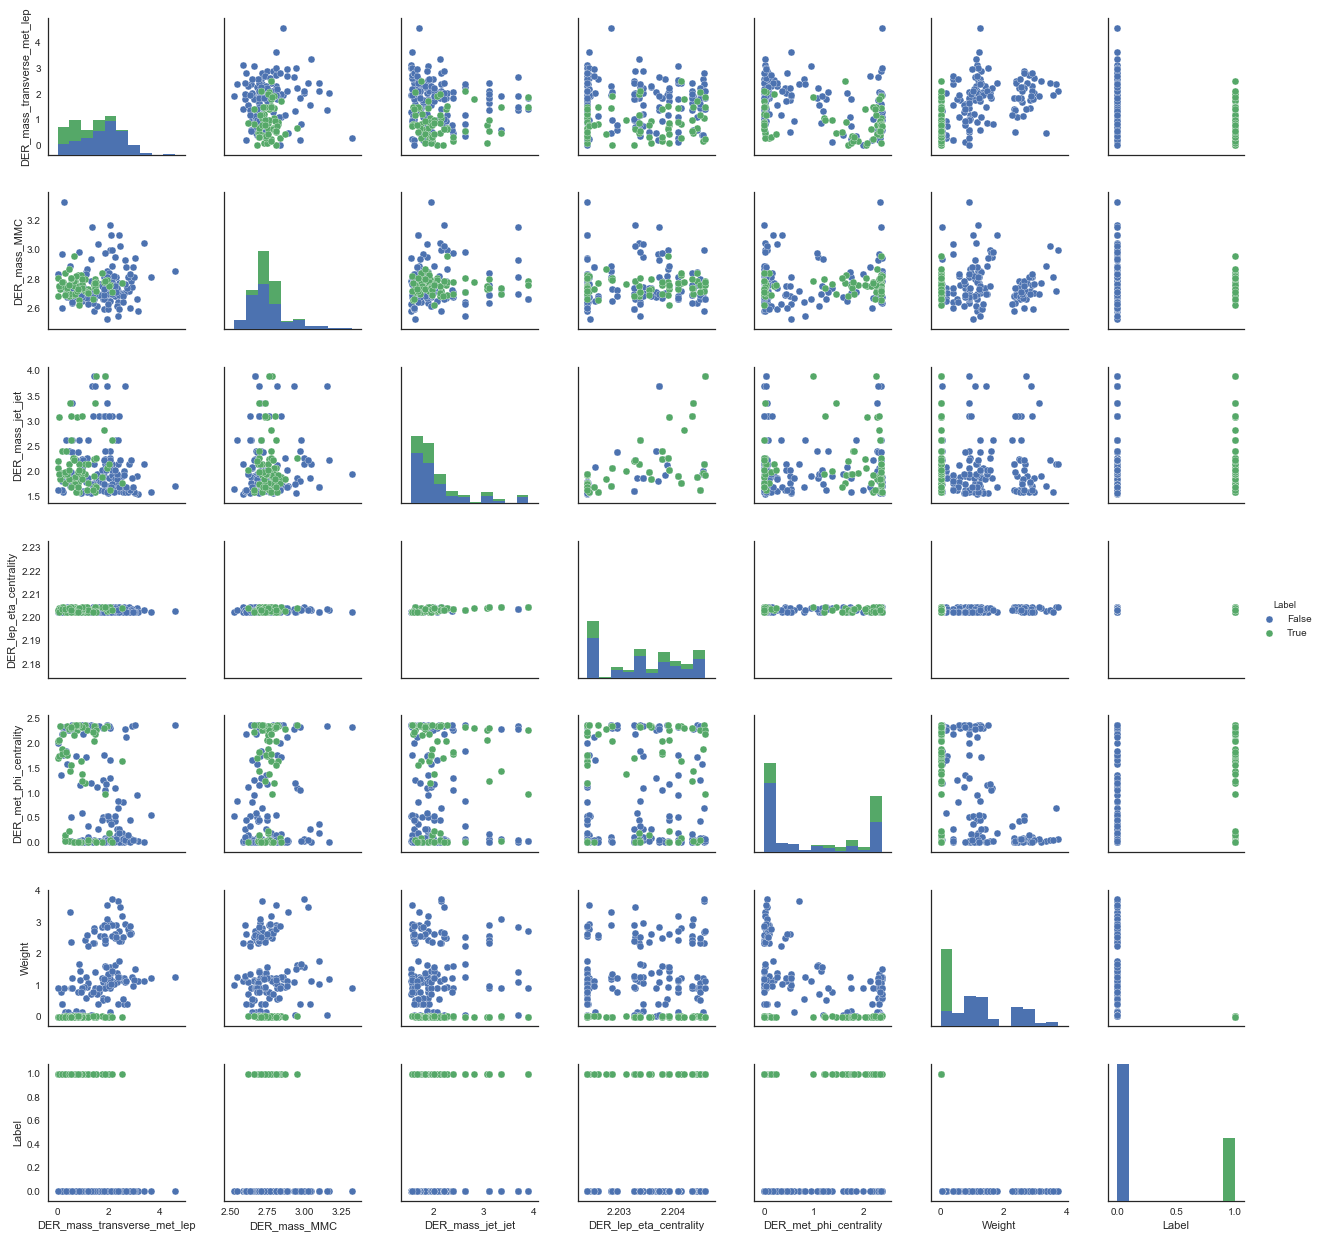

In [18]:
sns.pairplot(df_shrink[:200], hue="Label")

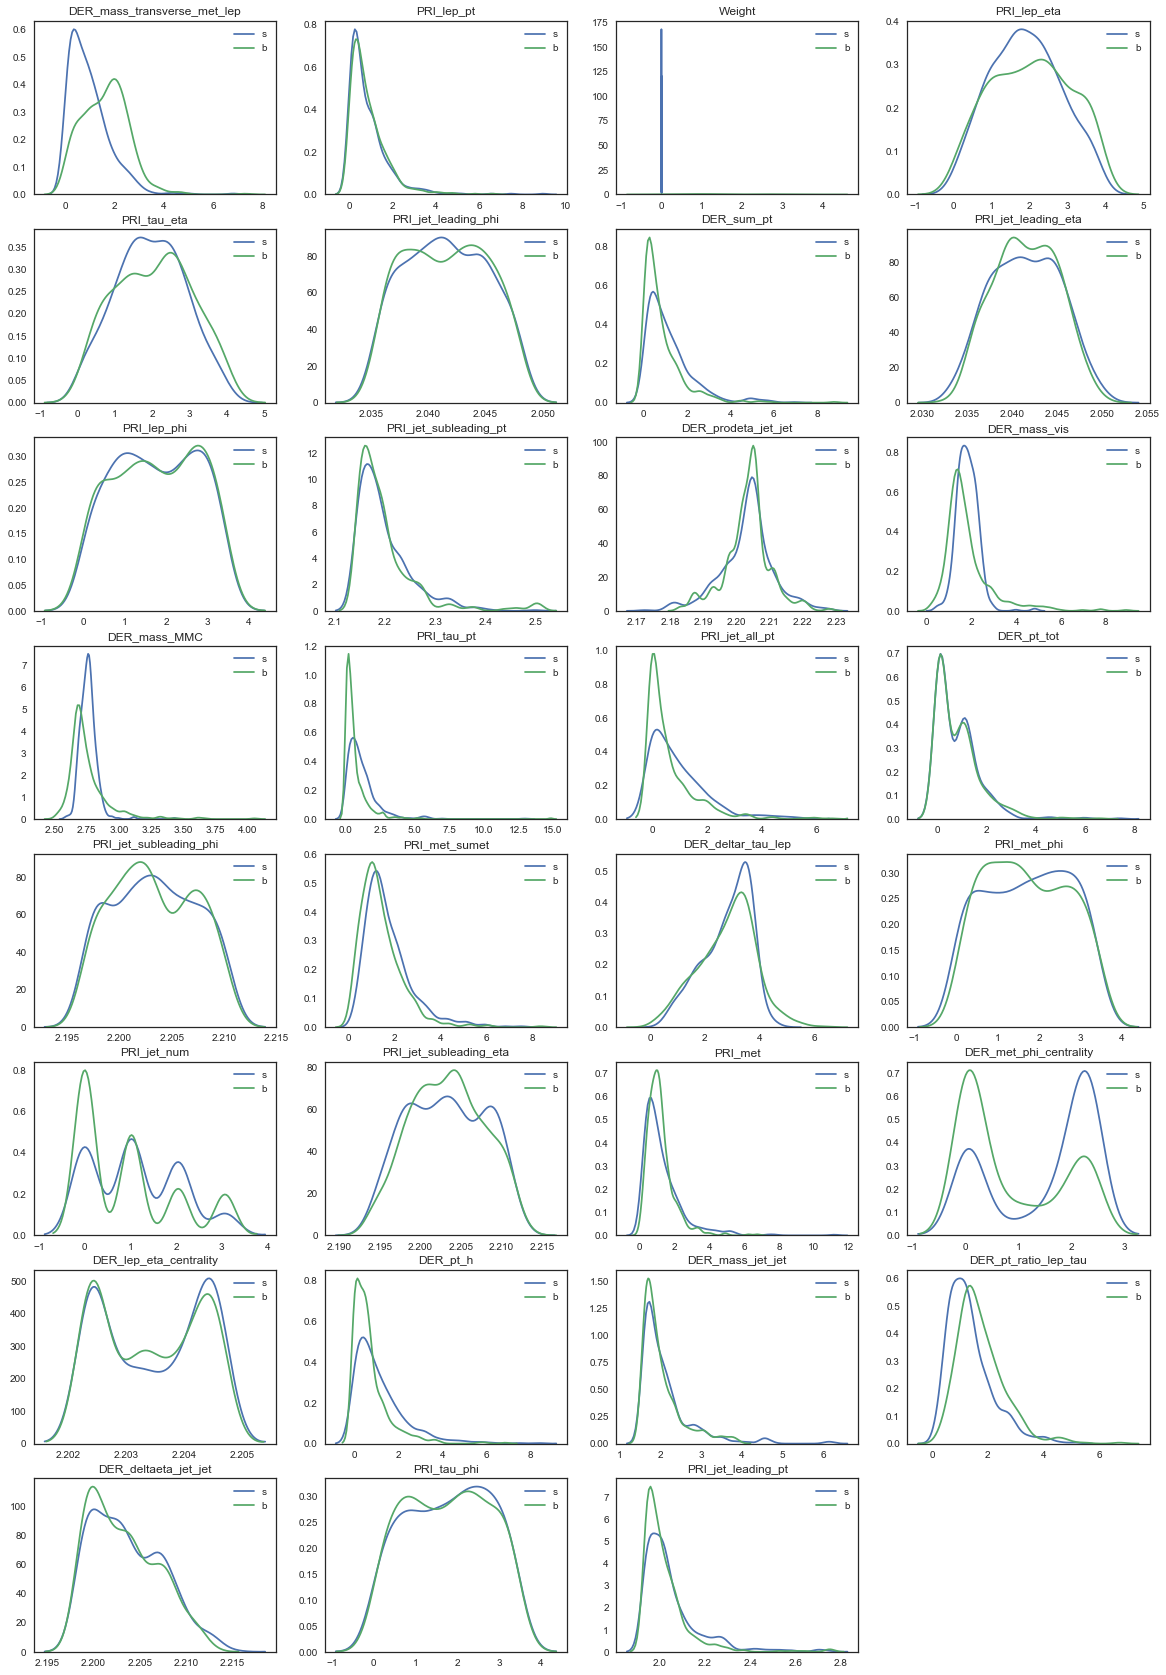

In [19]:
fig = plt.figure(figsize=(20,30))
ax = []

for i, feat in enumerate(features):
    ax.append(fig.add_subplot(n//4+1, 4, i+1))
    sns.distplot(df_scal[df_scal.Label == True][[feat]][:500], hist=False, kde=True, label = 's')
    sns.distplot(df_scal[df_scal.Label == False][[feat]][:500], hist=False, kde=True, label = 'b')
    plt.title(feat)

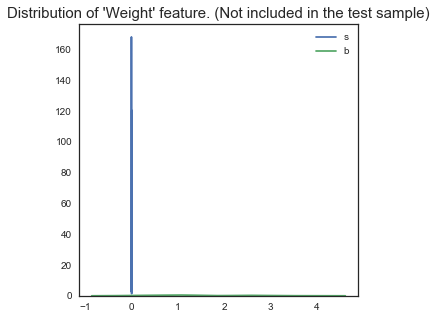

In [20]:
fig = plt.figure(figsize=(5,5))
sns.distplot(df_scal[df_scal.Label == True][['Weight']][:500], hist=False, kde=True, label = 's')
sns.distplot(df_scal[df_scal.Label == False][['Weight']][:500], hist=False, kde=True, label = 'b')
plt.title("Distribution of 'Weight' feature. (Not included in the test sample)", size=15)
plt.show()

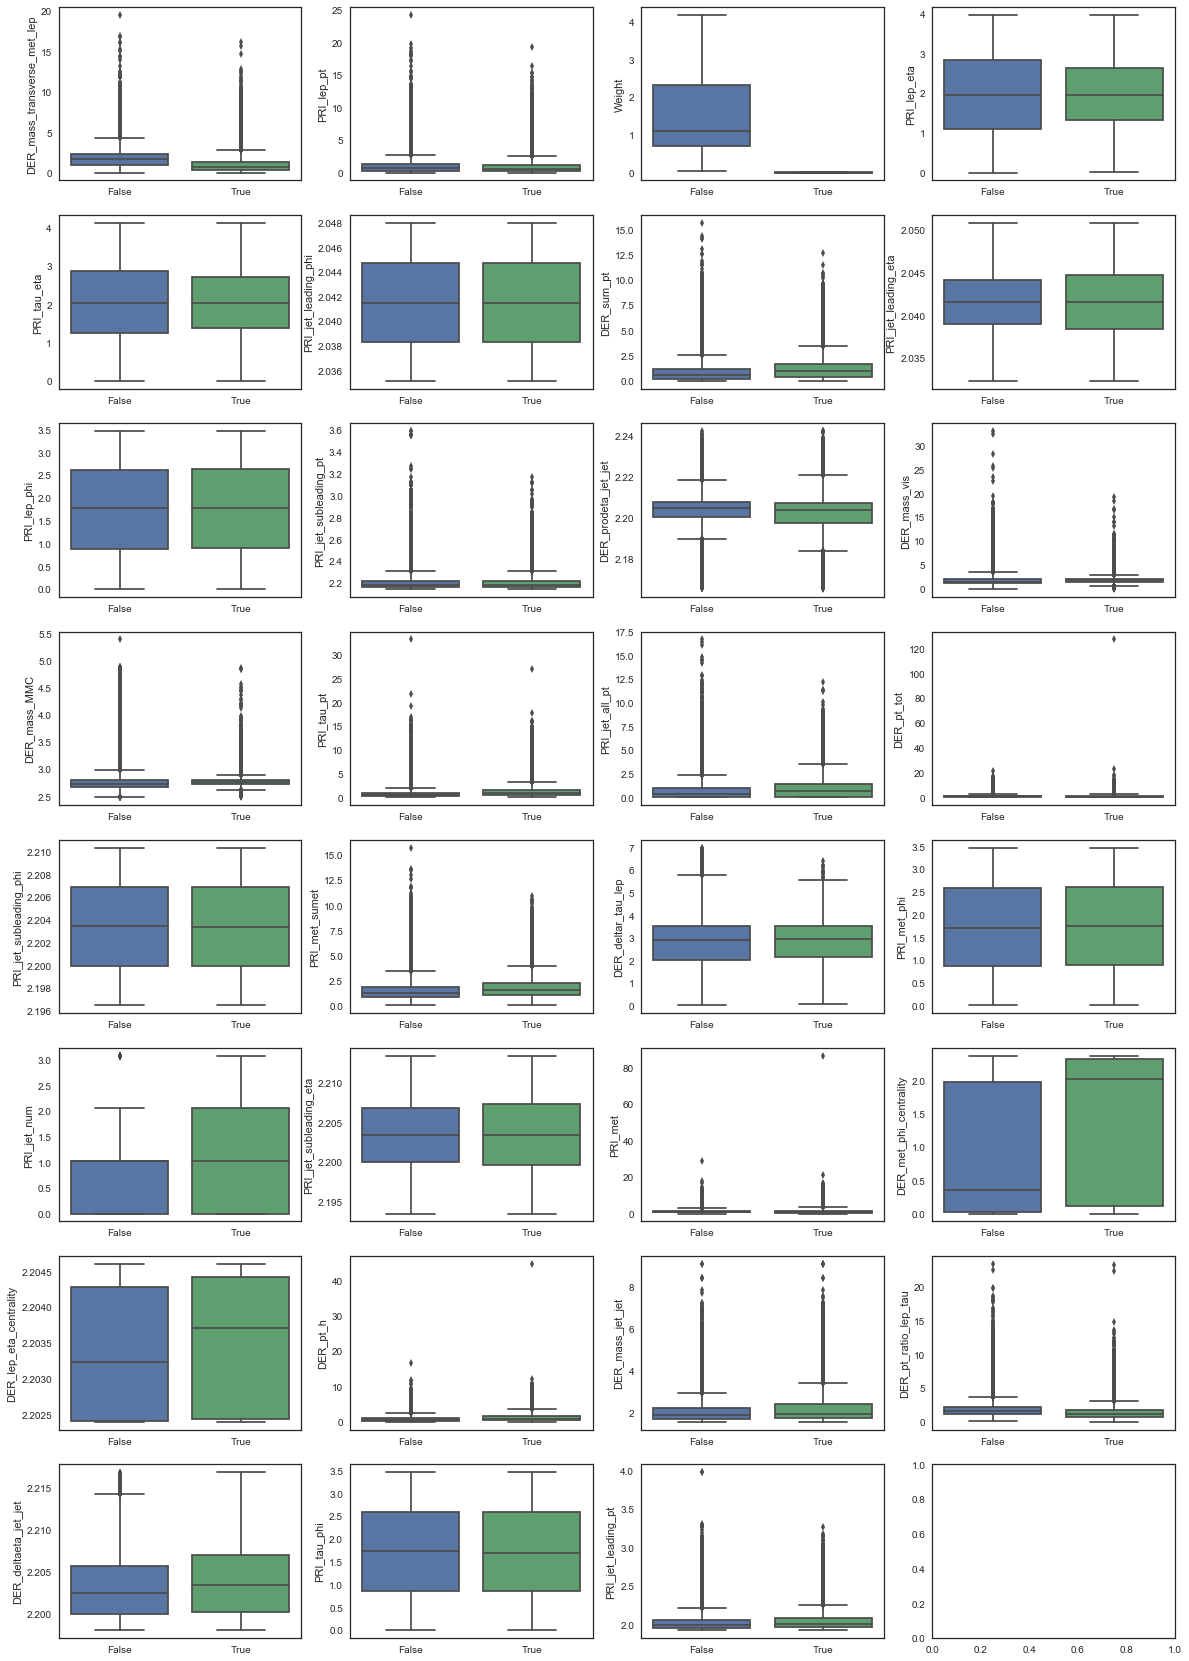

In [21]:
fig, axes = plt.subplots(nrows=n // 4 + 1, ncols=4, figsize=(20, 30))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Label', y=feat, data=df_scal, ax=axes[idx // 4, idx % 4])
    #axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel('')
    #axes[idx // 4, idx % 4].set_ylabel(feat);
    #axes[idx // 4, idx % 4].title(feat)

In [22]:
def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        print ('radicand is negative. Exiting')
        exit()
    else:
        return math.sqrt(radicand)

In [23]:
def AMS_metric(solution, submission):
    """  Prints the AMS metric value to screen.
    Solution File header: EventId, Class, Weight
    Submission File header: EventId, RankOrder, Class
    """
    
    numEvents = 250000 # number of events = size of test set
    
    # solutionDict: key=eventId, value=(label, class)
    solutionDict = create_solution_dictionary(solution)

    signal = 0.0
    background = 0.0
    if check_submission(submission, numEvents):
        with open(submission, 'rb') as f:
            sub = csv.reader(f)
            sub.next() # header row
            for row in sub:
                if row[2] == 's': # only events predicted to be signal are scored
                    if solutionDict[row[0]][0] == 's':
                        signal += float(solutionDict[row[0]][1])
                    elif solutionDict[row[0]][0] == 'b':
                        background += float(solutionDict[row[0]][1])
     
        print 'signal = {0}, background = {1}'.format(signal, background)
        print 'AMS = ' + str(AMS(signal, background))

SyntaxError: invalid syntax (<ipython-input-23-0c8e4c27a7d0>, line 25)

In [22]:
s = set(features)
s.remove('Weight')
features_ = list(s)

In [23]:
X = df_train_raw[features_]
y = df_train_raw.Label
y = y == 's'
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
#X_train.fillna(X_train.mean(), inplace=True)
#X_val.fillna(X_val.mean(), inplace=True)

In [25]:
df_test = pd.read_csv('./test.csv')

In [26]:
df_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


### Logistic Regression

In [28]:
X_ = X.copy()
X_[X == -999] = None
X_.fillna(X.mean(), inplace=True)
#X_train_, X_val_ = X_train.copy(), X_val.copy()
#X_train_[X_train == -999] = None
#X_val_[X_val == -999] = None
#X_train_.fillna(X_train.mean(), inplace=True)
#X_val_.fillna(X_val.mean(), inplace=True)

In [31]:
param_grid = [
    { 
          "clf__penalty": ["l2"],
    },
    { 
          "clf__penalty": ["l1"],
    }    
]
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

lr_cv = GridSearchCV(pipeline, param_grid, n_jobs=3, 
                   cv=StratifiedKFold(y, n_folds=3, shuffle=True), 
                   scoring='precision',
                   verbose=2, refit=True)
lr_cv.fit(X_, y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:  3.7min finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[ True False ... False False], n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid=[{'clf__penalty': ['l2']}, {'clf__penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='precision', verbose=2)

In [32]:
y_pred = lr_cv.predict(X_)
print(classification_report(y, y_pred, target_names=['s', 'b']))
print(roc_auc_score(y, y_pred))

             precision    recall  f1-score   support

          s       0.78      0.86      0.82    164333
          b       0.67      0.53      0.59     85667

avg / total       0.74      0.75      0.74    250000

0.6986559780300695


In [44]:
#y_val_pred = lr_cv.predict(X_val_)
#print(classification_report(y_val, y_val_pred, target_names=['s', 'b']))

             precision    recall  f1-score   support

          s       0.77      0.87      0.82     54446
          b       0.67      0.51      0.58     28054

avg / total       0.74      0.75      0.74     82500



In [45]:
#print(roc_auc_s#

0.6896232484095141


### RandomForestClassifier

In [34]:
param_grid = { 
          "max_depth":[7],
     "n_estimators":[200]
    }

rfc = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=3, 
                   cv=StratifiedKFold(y, n_folds=3, shuffle=True), 
                   verbose=2, refit=True)
rfc.fit(X, y)
y_pred = rfc.predict(X)
print(classification_report(y, y_pred, target_names=['s', 'b']))
print(roc_auc_score(y, y_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  2.6min finished


             precision    recall  f1-score   support

          s       0.84      0.90      0.87    164333
          b       0.78      0.68      0.73     85667

avg / total       0.82      0.83      0.82    250000

0.7909366827904578


In [32]:
#rfc = make_pipeline(RandomForestClassifier(n_estimators=50, max_depth=7))
#rfc.fit(X_train, y_train)
#y_pred = rfc.predict(X_train)
#print(classification_report(y_train, y_pred, target_names=['s', 'b']))

             precision    recall  f1-score   support

          s       0.85      0.90      0.87    109887
          b       0.78      0.69      0.73     57613

avg / total       0.82      0.83      0.82    167500



In [46]:
#y_val_pred = rfc.predict(X_val)
#print(classification_report(y_val, y_val_pred, target_names=['s', 'b']))

             precision    recall  f1-score   support

          s       0.84      0.90      0.87     54446
          b       0.78      0.68      0.72     28054

avg / total       0.82      0.82      0.82     82500



In [47]:
#print(roc_auc_score(y_val, y_val_pred))

0.789169434965031


In [34]:
feat_imp = rfc._final_estimator.feature_importances_
features[np.argmax(feat_imp)], feat_imp[np.argmax(feat_imp)]

('DER_mass_MMC', 0.2688854766655401)

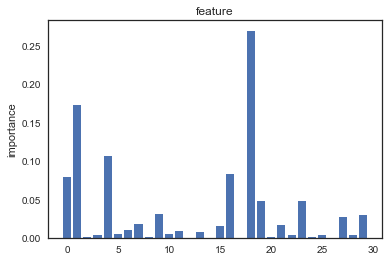

In [35]:
y_pos = np.arange(len(features_))

plt.bar(y_pos, feat_imp, align='center')
#plt.xticks(y_pos, features)
plt.ylabel('importance')
plt.title('feature')
 
plt.show()

### XGBClassifier

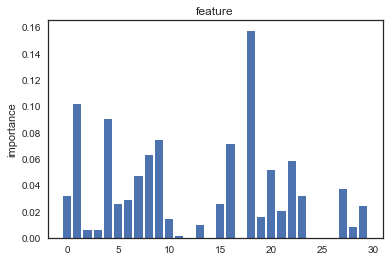

In [36]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
feat_imp = xgb.feature_importances_

plt.bar(y_pos, feat_imp, align='center')
#plt.xticks(y_pos, features)
plt.ylabel('importance')
plt.title('feature')
 
plt.show()

In [37]:
y_pred = xgb.predict(X_train)
print(classification_report(y_train, y_pred, target_names=['s', 'b']))

             precision    recall  f1-score   support

          s       0.86      0.90      0.88    109887
          b       0.78      0.71      0.75     57613

avg / total       0.83      0.83      0.83    167500



C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
y_val_pred = xgb.predict(X_val)
print(classification_report(y_val, y_val_pred, target_names=['s', 'b']))

             precision    recall  f1-score   support

          s       0.86      0.90      0.88     54446
          b       0.78      0.71      0.74     28054

avg / total       0.83      0.83      0.83     82500



C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
print(roc_auc_score(y_val, y_val_pred))

0.8016407599324984


In [39]:
xgb_model = XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [200], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}



clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(y, n_folds=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X, y)

#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  5.9min remaining:  8.8min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  6.2min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  6.2min finished


Raw AUC score: 0.9095753383372256


In [40]:
print(classification_report(y, clf.predict(X), target_names=['s', 'b']))

             precision    recall  f1-score   support

          s       0.87      0.91      0.89    164333
          b       0.80      0.74      0.77     85667

avg / total       0.85      0.85      0.85    250000



C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
feat_imp = clf.feature_importance_

plt.bar(y_pos, feat_imp, align='center')
#plt.xticks(y_pos, features)
plt.ylabel('importance')
plt.title('feature')
 
plt.show()

In [50]:
y_val_pred = clf.predict(X_val)
print(roc_auc_score(y_val, y_val_pred))

0.82058897903569


C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
